In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [30]:
df=pd.read_csv(r'C:\Users\dhruv\Downloads\datasets\skin1.csv')

In [31]:
df.head()

,Unnamed: 0,Disease,Type,Symptom_1,Symptom_2,Symptom_3,Symptom_4,Symptom_5,Symptom_6,Symptom_7,Symptom_8,Symptom_9,Symptom_10,Symptom_11,Symptom_12,Symptom_13,Symptom_14,Symptom_15,Symptom_16,Symptom_17
0,0,Fungal infection,Skin,itching,skin_rash,nodal_skin_eruptions,dischromic _patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,Fungal infection,Skin,skin_rash,nodal_skin_eruptions,dischromic _patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,Fungal infection,Skin,itching,nodal_skin_eruptions,dischromic _patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,Fungal infection,Skin,itching,skin_rash,dischromic _patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,Fungal infection,Skin,itching,skin_rash,nodal_skin_eruptions,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [32]:
df.isnull().sum()

Unnamed: 0      0
Disease         0
Type            0
Symptom_1      55
Symptom_2      55
Symptom_3      52
Symptom_4     141
Symptom_5     336
Symptom_6     449
Symptom_7     537
Symptom_8     586
Symptom_9     662
Symptom_10    658
Symptom_11    719
Symptom_12    789
Symptom_13    789
Symptom_14    789
Symptom_15    789
Symptom_16    789
Symptom_17    789
dtype: int64

In [33]:
df=df.drop(columns=['Unnamed: 0','Symptom_9','Symptom_11', 'Symptom_12', 'Symptom_13',
       'Symptom_14', 'Symptom_15', 'Symptom_16', 'Symptom_17'],axis=1)
df.head()

,Disease,Type,Symptom_1,Symptom_2,Symptom_3,Symptom_4,Symptom_5,Symptom_6,Symptom_7,Symptom_8,Symptom_10
0,Fungal infection,Skin,itching,skin_rash,nodal_skin_eruptions,dischromic _patches,NaN,NaN,NaN,NaN,NaN
1,Fungal infection,Skin,skin_rash,nodal_skin_eruptions,dischromic _patches,NaN,NaN,NaN,NaN,NaN,NaN
2,Fungal infection,Skin,itching,nodal_skin_eruptions,dischromic _patches,NaN,NaN,NaN,NaN,NaN,NaN
3,Fungal infection,Skin,itching,skin_rash,dischromic _patches,NaN,NaN,NaN,NaN,NaN,NaN
4,Fungal infection,Skin,itching,skin_rash,nodal_skin_eruptions,NaN,NaN,NaN,NaN,NaN,NaN


In [34]:
df.fillna("None",inplace=True)

In [35]:
df=df.drop(columns="Type",axis =1)

In [36]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [37]:
d=df["Disease"]
le.fit(df.values.flatten())
df=pd.DataFrame(columns=df.columns, data=le.transform(df.values.flatten()).reshape(df.shape))
df["Disease"]=d



In [38]:
le_name_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
print(le_name_mapping)

{' abdominal_pain': 0, ' blackheads': 1, ' blister': 2, ' dark_urine': 3, ' dischromic _patches': 4, ' fatigue': 5, ' headache': 6, ' high_fever': 7, ' inflammatory_nails': 8, ' joint_pain': 9, ' lethargy': 10, ' loss_of_appetite': 11, ' malaise': 12, ' mild_fever': 13, ' nodal_skin_eruptions': 14, ' pus_filled_pimples': 15, ' red_sore_around_nose': 16, ' red_spots_over_body': 17, ' scurring': 18, ' silver_like_dusting': 19, ' skin_peeling': 20, ' skin_rash': 21, ' small_dents_in_nails': 22, ' swelled_lymph_nodes': 23, ' vomiting': 24, ' weight_loss': 25, ' yellow_crust_ooze': 26, ' yellowish_skin': 27, 'Acne': 28, 'Chicken pox': 29, 'Fungal infection': 30, 'Impetigo': 31, 'Jaundice': 32, 'No disease': 33, 'None': 34, 'Psoriasis': 35, 'itching': 36}


In [44]:
df1=df.sample(frac=1)


In [45]:
df["Disease"].unique()

array(['Fungal infection', 'Jaundice', 'Chicken pox', 'Acne', 'Psoriasis',
       'Impetigo', 'No disease'], dtype=object)

(array([0.5, 1.5, 2.5, 3.5, 4.5, 5.5, 6.5, 7.5, 8.5]),
 [Text(0, 0.5, 'Symptom_1'),
  Text(0, 1.5, 'Symptom_2'),
  Text(0, 2.5, 'Symptom_3'),
  Text(0, 3.5, 'Symptom_4'),
  Text(0, 4.5, 'Symptom_5'),
  Text(0, 5.5, 'Symptom_6'),
  Text(0, 6.5, 'Symptom_7'),
  Text(0, 7.5, 'Symptom_8'),
  Text(0, 8.5, 'Symptom_10')])

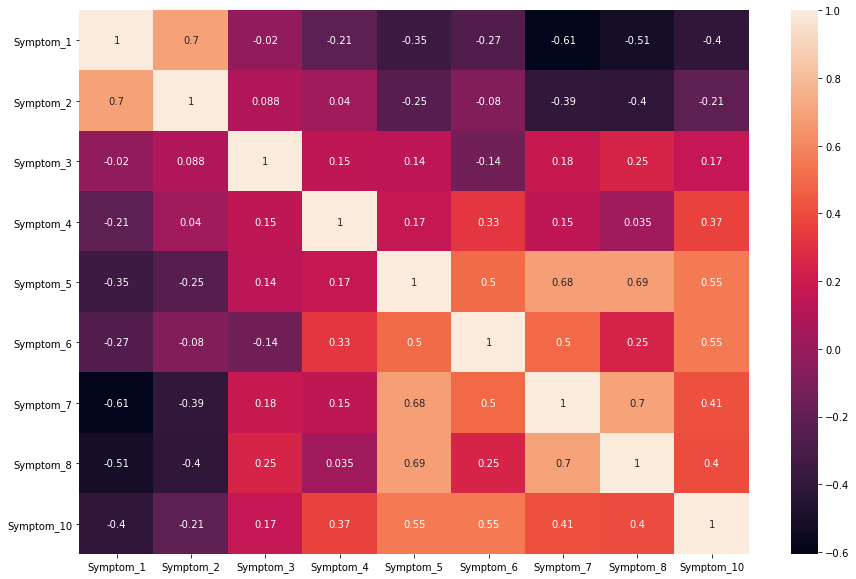

In [46]:
plt.subplots(figsize=(15,10))
sns.heatmap(df1.corr(),annot=True)
plt.yticks(rotation=0)

In [47]:
x=df1.iloc[:,1:]
y=df1.iloc[:,0]

In [48]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

In [49]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=1)
mod0=LogisticRegression()
mod0.fit(x_train,y_train)
y_pred=mod0.predict(x_test)

C:\Users\dhruv\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [50]:
result_lr=accuracy_score(y_test,y_pred)
result_lr

0.9704641350210971

In [51]:
print(confusion_matrix(y_test,y_pred))

[[33  0  0  0  0  0  0]
 [ 0 34  0  0  0  0  0]
 [ 5  0 34  0  0  0  0]
 [ 2  0  0 35  0  0  0]
 [ 0  0  0  0 40  0  0]
 [ 0  0  0  0  0 21  0]
 [ 0  0  0  0  0  0 33]]


In [52]:
b = mod0.predict_proba(x_test)

In [53]:
print(b)

[[4.44256470e-09 3.12654121e-10 1.82624544e-07 ... 3.31593444e-13
  1.92607748e-07 9.99999620e-01]
 [3.19867578e-25 9.99432084e-01 7.41566813e-07 ... 2.14274073e-04
  3.52900650e-04 3.32076505e-22]
 [4.44256470e-09 3.12654121e-10 1.82624544e-07 ... 3.31593444e-13
  1.92607748e-07 9.99999620e-01]
 ...
 [4.44256470e-09 3.12654121e-10 1.82624544e-07 ... 3.31593444e-13
  1.92607748e-07 9.99999620e-01]
 [7.74186072e-06 4.19454955e-04 9.94752477e-01 ... 9.24937110e-09
  3.78678586e-03 3.43681895e-08]
 [1.19206803e-25 5.63333961e-18 3.18860463e-16 ... 8.97405796e-21
  1.00000000e+00 1.99684993e-22]]
